In [1]:
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
data = pd.read_csv('data/data_train_DF.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
0,0.0,0.000000,-95.25,49.25,0.24,1993,3,0.000006,0.015857,0.000023,...,0.222032,0.166899,265.457680,268.867126,-0.005898,9.187450e+06,-5231370.50,97849.906250,-0.000340,0.000448
1,0.0,0.000000,-94.75,49.25,0.39,1993,3,0.000005,0.002749,0.000002,...,0.184119,0.142053,265.521764,268.412354,-0.001131,6.993830e+06,-4851900.00,97954.703125,-0.000264,0.000462
2,0.0,0.000000,-122.75,48.75,0.48,1993,3,0.002420,0.103964,0.003870,...,-0.952649,0.856508,276.699820,280.594666,-0.010519,1.052566e+07,-4860741.00,100808.468750,-0.001945,0.004545
3,3.0,8.000000,-122.25,48.75,1.00,1993,3,0.002988,0.237442,0.004040,...,-0.845677,0.462569,274.943327,278.574371,-0.008420,9.359787e+06,-4653411.50,98474.648438,-0.001256,0.006174
4,0.0,0.000000,-121.75,48.75,1.00,1993,3,0.000000,0.004782,0.000196,...,-0.504174,0.195447,271.235317,274.578064,-0.005976,7.479946e+06,-3889238.75,91660.625000,-0.000502,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563978,6.0,134.600006,-80.75,25.75,1.00,2015,9,0.014934,0.017630,0.001066,...,-0.464231,0.159478,296.832658,300.201447,-0.006076,1.632964e+07,-3884615.75,101323.140625,-0.004034,0.006132
563979,1.0,30.000000,-80.25,25.75,0.66,2015,9,0.014798,0.014336,0.001253,...,-0.649578,0.404771,297.139517,300.414673,-0.005535,1.552289e+07,-3794893.75,101300.398438,-0.003913,0.006199
563980,0.0,0.000000,-81.25,25.25,0.28,2015,9,0.000000,0.000000,0.000000,...,-0.849243,0.676130,297.105902,301.003082,-0.007343,1.738194e+07,-3929039.00,101333.078125,-0.004233,0.003420
563981,2.0,179.100006,-80.75,25.25,0.76,2015,9,0.015875,0.039337,0.000373,...,-0.838257,0.589142,297.059054,300.905426,-0.006938,1.732889e+07,-4057722.00,101332.671875,-0.004125,0.003929


# Data Description

- CNT : number of wildfires (values to be predicted are given as NA)
- BA : aggregated burnt area of wildfires in acres (values to be predicted are given as NA)
- lon : longitude coordinate of grid cell center
- lat : latitude coordinate of grid cell center
- area : the proportion of a grid cell that overlaps the continental US (a value in (0,1], which can be smaller than 1 for grid cells on the boundary of the US territory)
- month : month of observation (integer value between 3 and 9)
- year : year of observation (integer value between 1 and 23, with 1 corresponding to year 1993 and 23 to year 2015)
- lc1 to lc18 : area proportion of 18 land cover classes in the grid cell (see details below)
- altiMean, altiSD : altitude-related variables given as mean and standard devation in the grid cell (see details below)
- clim1 to clim10 : monthly means of 10 meteorological variables in the grid cell (see details below)

### Land : 
1. cropland rainfed
2. cropland rainfed herbaceous cover
3. mosaic cropland
4. mosaic natural vegetation
5. tree broadleaved evergreen closed to open
6. tree broadleaved deciduous closed to open
7. tree needleleave evergreen closed to open
8. tree needleleaved deciduous closed to open
9. tree mixed
10. mosaic tree and shrub
11. shrubland
12. grassland
13. sparse vegetation
14. tree cover flooded fresh or brakish water
15. shrub or herbaceous cover flooded
16. urban
17. bare areas
18. water

In [3]:
data.dtypes

CNT         float64
BA          float64
lon         float64
lat         float64
area        float64
year          int64
month         int64
lc1         float64
lc2         float64
lc3         float64
lc4         float64
lc5         float64
lc6         float64
lc7         float64
lc8         float64
lc9         float64
lc10        float64
lc11        float64
lc12        float64
lc13        float64
lc14        float64
lc15        float64
lc16        float64
lc17        float64
lc18        float64
altiMean    float64
altiSD      float64
clim1       float64
clim2       float64
clim3       float64
clim4       float64
clim5       float64
clim6       float64
clim7       float64
clim8       float64
clim9       float64
clim10      float64
dtype: object

In [4]:
data_validation = data[data.BA.isna() | data.CNT.isna()]
print('- Validation Set Size :',len(data_validation),'- Proportion : %5.2f %%' % (100*len(data_validation)/len(data)))
print('- CNT/BA both NA :', len(data[data.BA.isna() & data.CNT.isna()]))

- Validation Set Size : 111053 - Proportion : 19.69 %
- CNT/BA both NA : 48947


In [5]:
# Dropping the NA rows for prediction
data.dropna(inplace=True)
data_validation

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
24521,0.0,NaN,-95.25,49.25,0.24,1994,3,0.000006,0.015857,0.000023,...,0.946406,0.144371,265.391803,270.979340,-0.009633,9.305138e+06,-5300118.0,97331.609375,-0.000455,0.000782
24522,0.0,NaN,-94.75,49.25,0.39,1994,3,0.000005,0.002748,0.000002,...,1.045387,0.154082,266.060096,270.119049,-0.001791,6.697112e+06,-4841393.5,97431.398438,-0.000468,0.000770
24523,NaN,0.0,-122.75,48.75,0.48,1994,3,0.002392,0.103736,0.003870,...,0.011068,0.968480,276.763425,280.494415,-0.010566,1.171439e+07,-5558195.5,100849.781250,-0.002340,0.004444
24530,NaN,147.0,-119.25,48.75,1.00,1994,3,0.013003,0.035858,0.015668,...,-0.095432,0.339641,269.058750,274.362122,-0.005310,8.828294e+06,-5754396.5,90521.390625,-0.000236,0.000691
24531,NaN,0.0,-118.75,48.75,1.00,1994,3,0.001422,0.006885,0.000766,...,0.230673,0.496038,268.924607,273.778320,-0.009975,1.032284e+07,-5866697.0,89332.390625,-0.000267,0.000894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539453,NaN,NaN,-80.25,26.25,0.80,2014,9,0.015641,0.092375,0.001888,...,-1.401931,0.493013,296.177424,299.561981,-0.005558,1.503111e+07,-3750171.0,101506.929688,-0.003868,0.007151
539455,0.0,NaN,-97.25,25.75,0.20,2014,9,0.024073,0.155059,0.005064,...,-2.755768,0.709710,296.900647,300.315582,-0.005744,1.457064e+07,-3652361.5,101261.296875,-0.003552,0.007080
539457,0.0,NaN,-80.75,25.75,1.00,2014,9,0.014947,0.017654,0.001066,...,-1.304978,0.109365,295.976929,299.691437,-0.006194,1.599233e+07,-3920195.0,101504.890625,-0.004009,0.006439
539459,NaN,NaN,-81.25,25.25,0.28,2014,9,0.000000,0.000000,0.000000,...,-2.374217,0.536569,296.145054,300.574768,-0.007897,1.674244e+07,-3991987.5,101507.390625,-0.004056,0.003803


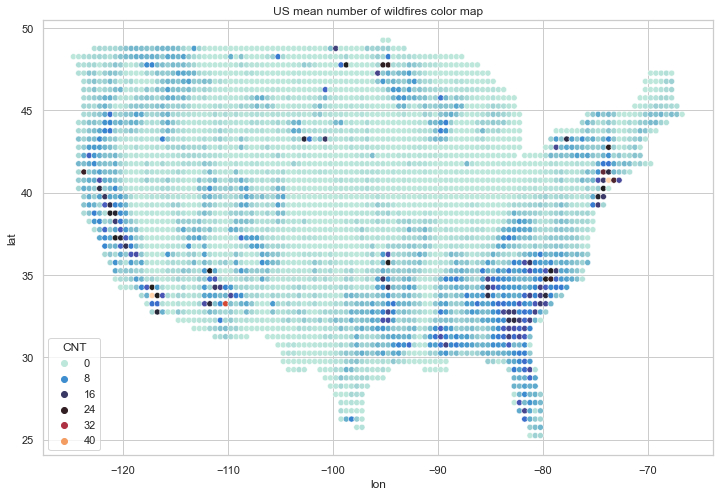

In [6]:
# Plotting wildfires map
plt.figure(figsize=(12,8))
plt.title('US mean number of wildfires color map')
sns.scatterplot(x="lon", y="lat", hue='CNT', palette='icefire', legend=True,
                data=data.groupby(by=['lon','lat'])[['CNT']].mean().reset_index());

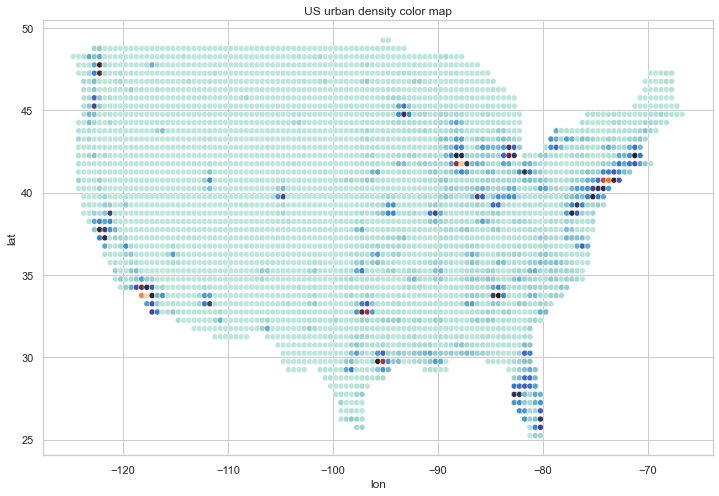

In [7]:
# Plotting Urban map
plt.figure(figsize=(12,8))
plt.title('US urban density color map')
sns.scatterplot(x="lon", y="lat", hue='lc16', palette='icefire', legend=False,
                data=data.groupby(by=['lon','lat'])[['lc16']].mean().reset_index());

It seems there is a strong correlation between urban density and wildfires since most of the fires start by a human error or because ecological impact on the area from construction.

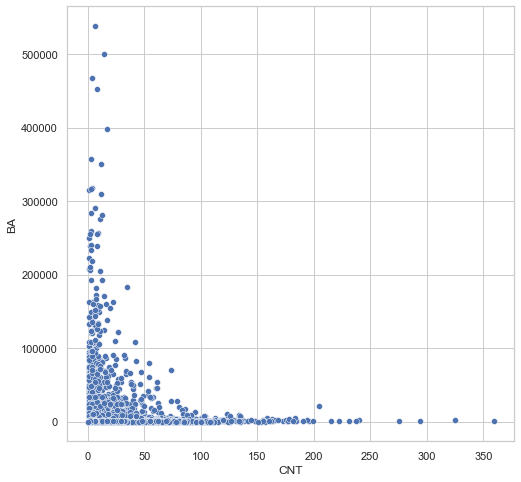

In [8]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='CNT', y='BA', data=data);

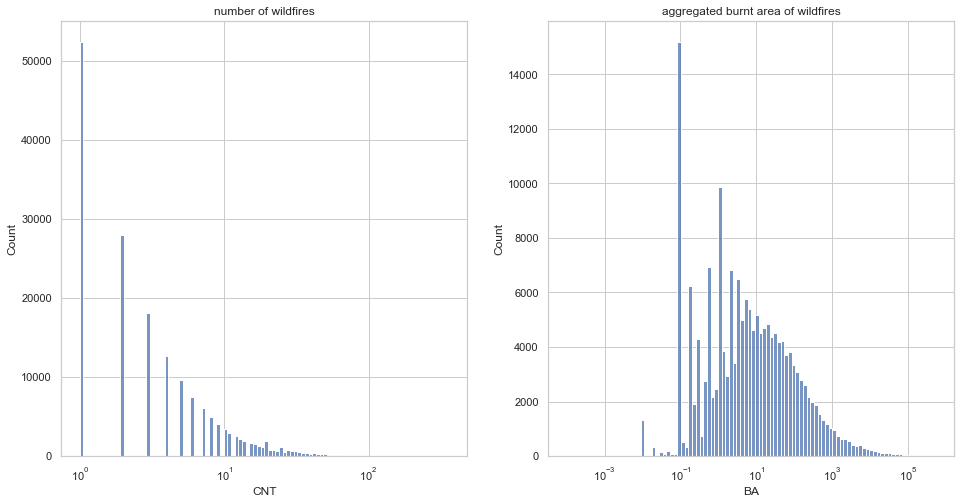

In [9]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].set_title('number of wildfires')
sns.histplot(x='CNT', log_scale=True, bins=100, data=data[data.CNT!=0], ax=ax[0])
ax[1].set_title('aggregated burnt area of wildfires')
sns.histplot(x='BA', log_scale=True, bins=100, data=data[data.BA!=0], ax=ax[1]);

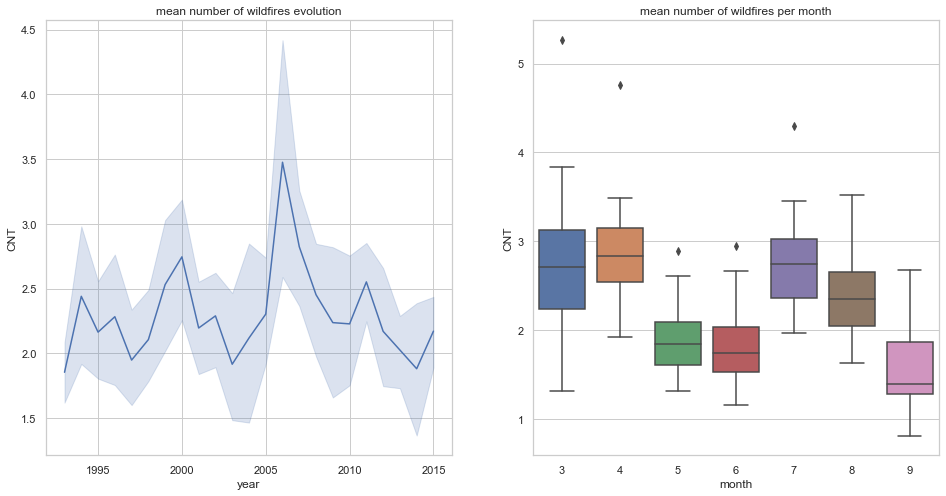

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('mean number of wildfires evolution')
sns.lineplot(x='year', y='CNT', data=data.groupby(by=['year','month'])[['CNT']].mean().reset_index(), ax=ax[0])
ax[1].set_title('mean number of wildfires per month')
sns.boxplot(x='month', y='CNT', data=data.groupby(by=['year','month'])[['CNT']].mean().reset_index(), ax=ax[1]);

We have an increase in the number of wildfires during march and april. June and July lower (isn't it odd?).

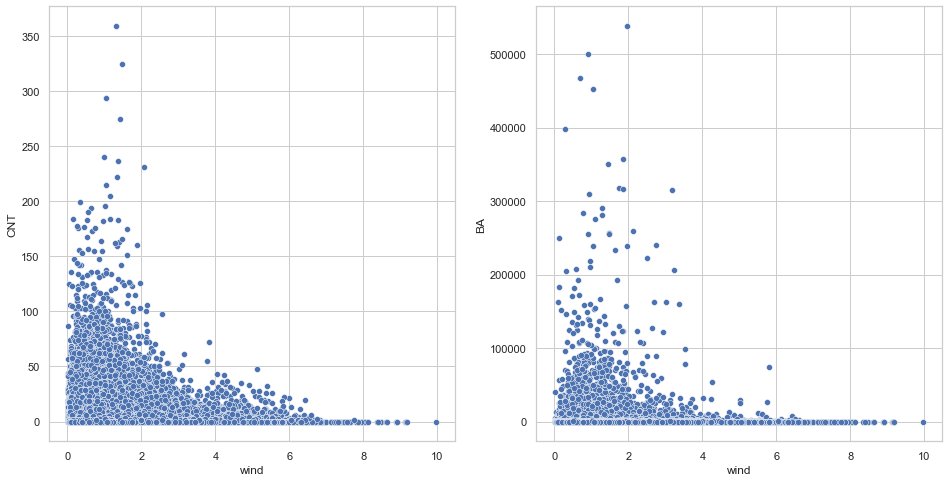

In [13]:
# Adding wind variable regardless of direction
data['wind'] = np.sqrt(data['clim1']**2+data['clim2']**2)

fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.scatterplot(y=data['CNT'], x=data['wind'], ax=ax[0])
sns.scatterplot(y=data['BA'], x=data['wind'], ax=ax[1]);

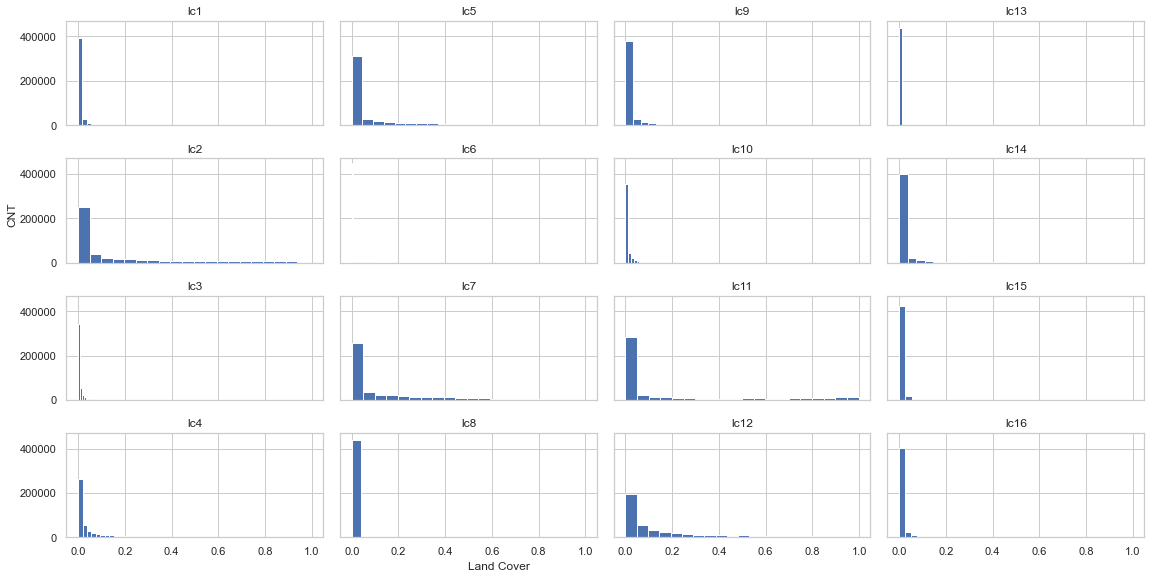

In [61]:
fig, ax = plt.subplots(4,4, figsize=(16,8), sharey=True, sharex=True)

for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)]
    sbplt.hist(data['lc'+str(i+1)].values, bins=20)
    sbplt.set_title('lc'+str(i+1))
    
fig.tight_layout()

fig.text(0.4,0, 'Land Cover')
fig.text(0,0.6, 'CNT', rotation=90);

In [15]:
# Which land type is the most easy to burn
data['land'] = data[['lc1', 'lc2', 'lc3','lc4', 'lc5', 'lc6', 'lc7', 'lc8', 'lc9', 'lc10',
      'lc11', 'lc12','lc13', 'lc14', 'lc15', 'lc16', 'lc17', 'lc18']].idxmax(axis=1)

data.groupby(by=['land'])[['CNT','BA']].mean().reset_index().sort_values('CNT', ascending=False)

,land,CNT,BA
6,lc16,7.646064,176.480008
12,lc7,5.060459,207.560088
5,lc15,3.318284,1812.273773
13,lc8,3.138737,516.883758
11,lc5,3.132534,35.735466
10,lc4,2.452849,10.958051
4,lc14,1.923289,121.457669
3,lc12,1.834742,127.538074
8,lc18,1.667006,62.990384
2,lc11,1.446204,337.403245


In [16]:
data.groupby(by=['land'])[['CNT','BA']].mean().reset_index().sort_values('BA', ascending=False)

,land,CNT,BA
5,lc15,3.318284,1812.273773
13,lc8,3.138737,516.883758
2,lc11,1.446204,337.403245
12,lc7,5.060459,207.560088
0,lc1,0.454910,196.959319
6,lc16,7.646064,176.480008
3,lc12,1.834742,127.538074
4,lc14,1.923289,121.457669
8,lc18,1.667006,62.990384
7,lc17,0.117347,41.966207


This is very interesting except the lc18 corresponding to water which seems high. Urban density (human) seems to be the most responsible for fires. Something odd too : lc15 one the highest CNT mean and highest BA mean corresponds to flooded herbs. The only conclusion I got is maybe we should have different variables for fire occurence and fire duration/propagation.

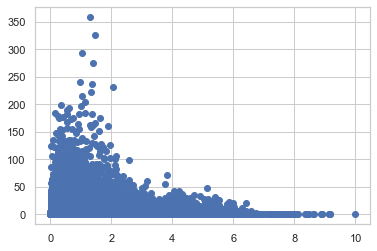

In [25]:
# Analysis of climate variables
data['clim'] = data[['altiMean', 'altiSD', 'clim1', 'clim2', 'clim3', 'clim4', 'clim5',
                     'clim6', 'clim7', 'clim8','clim9', 'clim10']].idxmax(axis=1)

data.groupby(by=['clim'])[['CNT','BA']].mean().reset_index().sort_values('CNT', ascending=False)

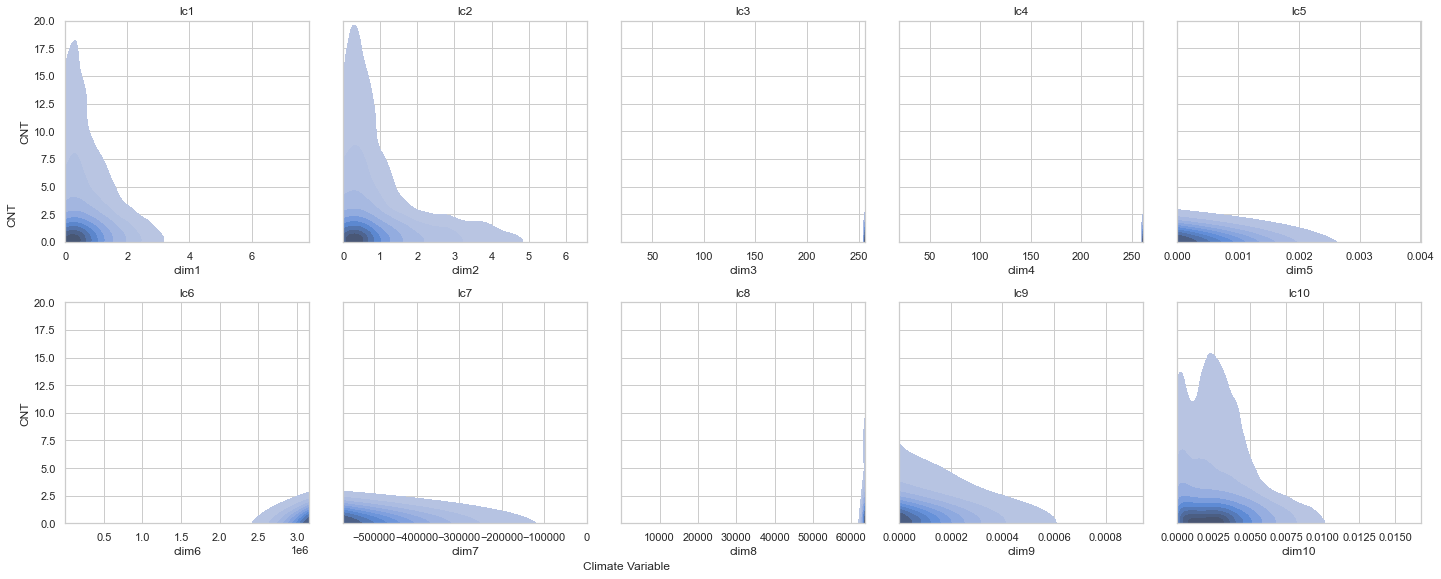

In [87]:
'''

fig, ax = plt.subplots(2,5, figsize=(20,8), sharey=True, sharex=False)

for i in range(10):
    sns.kdeplot(data=data[data.year<1994], x='clim'+str(i+1), y='CNT', fill=True, clip=(0,20), ax=ax[math.floor(i/5), i%5])
    ax[math.floor(i/5), i%5].set_title('lc'+str(i+1))
    
fig.tight_layout()

fig.text(0.4,0, 'Climate Variable')
fig.text(0,0.6, 'CNT', rotation=90);

#sns.jointplot(data=data[data.year<1994], x='clim2', y='CNT', kind='kde', fill=True, ylim=(0,20));

'''

In [13]:
# Adding indicator for fire occurence
data['fire'] = data['CNT'].apply(lambda x: 1 if x>0 else 0)

In [14]:
no_fire_pi = 10
data[data['fire']==0].sample(n=no_fire_pi, random_state=42)

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim4,clim5,clim6,clim7,clim8,clim9,clim10,wind,land,fire
128794,0.0,0.0,-103.75,34.75,1.00,1998,4,0.000314,0.063738,0.007808,...,285.026154,-0.008288,2.016615e+07,-9789087.0,85662.015625,-0.001647,0.000695,2.160486,lc12,0
354637,0.0,0.0,-84.75,44.25,1.00,2007,6,0.001487,0.026587,0.016081,...,293.445282,-0.025365,2.148330e+07,-6348392.5,97469.937500,-0.004304,0.002999,0.681113,lc5,0
249062,0.0,0.0,-98.25,46.75,1.00,2003,4,0.002094,0.828623,0.000302,...,279.894043,-0.005291,1.521789e+07,-6035712.0,96254.914062,-0.001686,0.001227,1.696801,lc2,0
401760,0.0,0.0,-101.25,36.25,1.00,2009,5,0.003248,0.436498,0.004272,...,291.638672,-0.008551,1.848157e+07,-7574098.5,90588.609375,-0.001992,0.001130,2.051248,lc12,0
182285,0.0,0.0,-91.25,48.25,0.40,2000,6,0.000000,0.000000,0.000000,...,286.301300,-0.015579,1.685866e+07,-4169614.0,95913.828125,-0.002458,0.003872,0.671810,lc8,0
73500,0.0,0.0,-100.25,28.25,0.37,1995,9,0.128683,0.032709,0.041032,...,300.940796,-0.008391,1.681767e+07,-6211528.5,98454.117188,-0.002285,0.003112,2.881051,lc11,0
155854,0.0,0.0,-112.25,39.75,1.00,1999,5,0.005554,0.027025,0.003067,...,284.838196,-0.005799,2.170299e+07,-9188842.0,82924.531250,-0.002835,0.001950,0.540549,lc11,0
119952,0.0,0.0,-71.25,44.25,1.00,1997,9,0.000134,0.008655,0.000096,...,285.206573,-0.011906,1.164469e+07,-4206686.5,95018.015625,-0.002248,0.002368,0.774442,lc9,0
270459,0.0,0.0,-85.75,44.75,1.00,2004,3,0.003189,0.031608,0.016535,...,272.935547,-0.004174,8.848903e+06,-3855285.5,98769.492188,-0.000417,0.003072,0.915437,lc18,0
59962,0.0,0.0,-109.75,46.25,1.00,1995,6,0.035088,0.127380,0.010274,...,286.412231,-0.006741,1.980051e+07,-6914186.5,85214.515625,-0.003674,0.004075,0.381111,lc12,0


# Modelling 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
# General Model (bad - nearly flip a coin)

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fire','land','CNT','BA','wind'], axis=1), data['fire'], test_size=0.3, random_state=42)

# Fitting LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
clf.predict_proba(X_train)
clf.predict(X_train)
clf.score(X_test, y_test)

0.6351974918861635

In [17]:
# Use FWI variables, urban density and water

# Labels in the data used to compute the Fire Weather Index
fwi_labels = ['clim4','wind','clim10','clim5']

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data[fwi_labels+['lc16','lc18']], data['fire'], test_size=0.3, random_state=42)

# Fitting LogisticRegression
clf = LogisticRegression(max_iter=200, random_state=42).fit(X_train, y_train)
clf.predict_proba(X_train)
clf.predict(X_train)
clf.score(X_test, y_test)

0.6883624401121586

# Validation Set

In [18]:
# Land Cover
data_validation[['lc1', 'lc2', 'lc3', 'lc4', 'lc5', 'lc6', 'lc7', 'lc8', 'lc9',
                 'lc10', 'lc11', 'lc12', 'lc13', 'lc14', 'lc15', 'lc16', 'lc17', 'lc18']].describe()

,lc1,lc2,lc3,lc4,lc5,lc6,lc7,lc8,lc9,lc10,lc11,lc12,lc13,lc14,lc15,lc16,lc17,lc18
count,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000
mean,0.011267,0.169309,0.008703,0.039918,0.091151,0.000384,0.140786,0.015555,0.024476,0.009346,0.187106,0.184370,0.002099,0.015366,0.007433,0.013069,0.010298,0.066050
std,0.026214,0.255583,0.017337,0.059868,0.174969,0.004647,0.208366,0.085672,0.072803,0.018903,0.301780,0.237019,0.011604,0.045587,0.029236,0.036799,0.042567,0.175451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001130,0.003423,0.000576,0.003011,0.000000,0.000000,0.000764,0.000000,0.000000,0.000221,0.000413,0.014765,0.000000,0.000032,0.000079,0.000223,0.000149,0.001158
50%,0.003872,0.032166,0.002547,0.013335,0.001482,0.000000,0.026837,0.000000,0.000153,0.001561,0.008440,0.068955,0.000076,0.000709,0.000647,0.002305,0.000796,0.006839
75%,0.009535,0.232371,0.008654,0.049815,0.089065,0.000000,0.210371,0.000000,0.009978,0.009127,0.255364,0.270456,0.000419,0.006337,0.003098,0.008987,0.003458,0.027060
max,0.375089,0.988417,0.176975,0.382161,0.917611,0.096545,0.982913,0.814536,0.649428,0.230381,0.999242,0.964968,0.204354,0.732465,0.537217,0.518609,0.736066,1.000000


In [19]:
# Climate
data_validation[['clim1', 'clim2', 'clim3', 'clim4', 'clim5', 'clim6', 'clim7', 'clim8', 'clim9', 'clim10']].describe()

,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
count,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,1.110530e+05,1.110530e+05,111053.000000,111053.000000,1.110530e+05
mean,0.343141,0.524200,280.594060,290.193929,-0.012096,1.768349e+07,-7.037391e+06,92939.606324,-0.002300,2.262648e-03
std,0.910203,0.911463,8.676039,8.254226,0.007166,3.833150e+06,2.501854e+06,7539.022479,0.001288,1.761580e-03
min,-5.006887,-5.350661,256.781434,261.814606,-0.056349,3.537317e+06,-1.635055e+07,67480.117188,-0.006438,4.444519e-07
25%,-0.127085,-0.024468,273.664950,285.154816,-0.016140,1.535604e+07,-8.451301e+06,87039.992188,-0.003359,8.907118e-04
50%,0.375857,0.394958,280.881152,291.592590,-0.009775,1.782945e+07,-6.218574e+06,96095.835938,-0.002274,1.929479e-03
75%,0.852706,0.923087,287.935405,296.488129,-0.007150,2.022605e+07,-5.204926e+06,98969.492188,-0.001209,3.268180e-03
max,7.109306,6.209711,298.096923,309.566345,0.000475,2.857818e+07,-1.165547e+06,102226.859375,0.000475,2.109621e-02


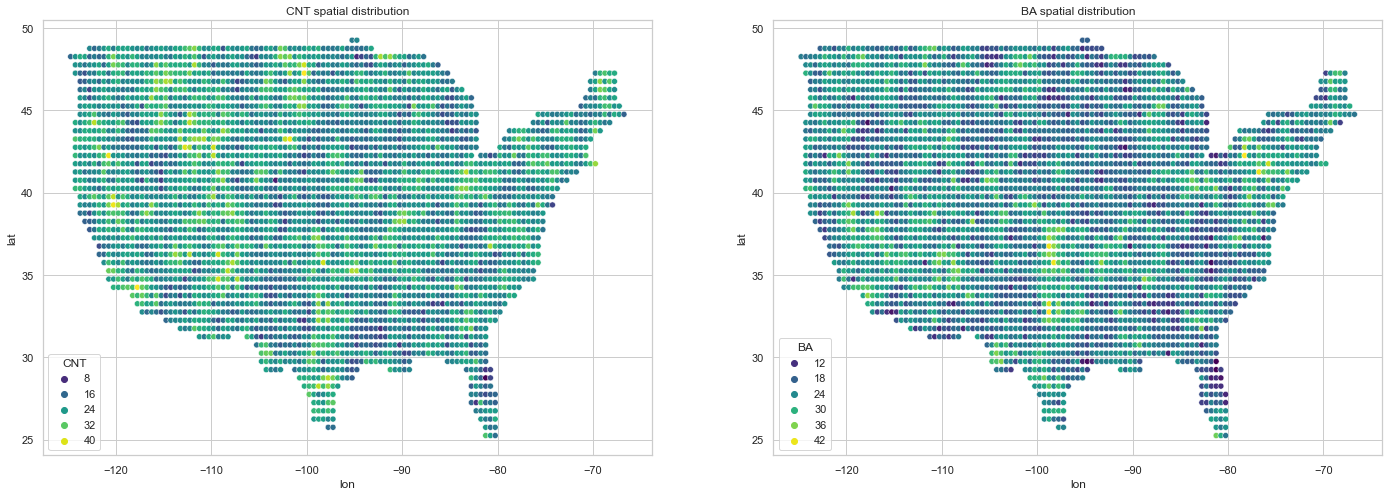

In [20]:
# Spatial distribution in the validation set
fig, ax = plt.subplots(1,2, figsize=(24,8))

sns.scatterplot(x="lon", y="lat", hue='CNT', palette='viridis', legend=True, 
                data=data_validation.groupby(by=['lon','lat']).agg({'CNT': lambda x: x.isnull().sum()}).reset_index(), 
                ax=ax[0])
ax[0].set_title('CNT spatial distribution')

sns.scatterplot(x="lon", y="lat", hue='BA', palette='viridis', legend=True, 
                data=data_validation.groupby(by=['lon','lat']).agg({'BA': lambda x: x.isnull().sum()}).reset_index(), 
                ax=ax[1])
ax[1].set_title('BA spatial distribution');

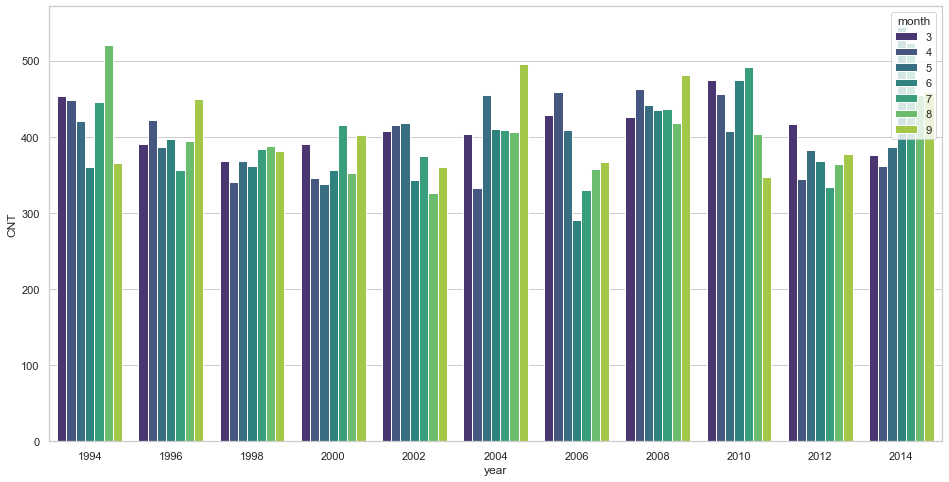

In [21]:
# Temporal distribution in the validation set
plt.figure(figsize=(16,8))
sns.barplot(x='year', y='CNT', hue='month', palette='viridis',
            data=data_validation.groupby(by=['year','month'])[['CNT']].count().reset_index());